In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as path_effects



import random
from random import randint
from tqdm import tqdm

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#from sklearn.metrics import plot_roc_curve #require python 3.5 or higher version
!pip install xgboost
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import re
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to C:\Users\ML
[nltk_data]     DL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\ML
[nltk_data]     DL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
unfilteredData = pd.read_csv("Musical_instruments_reviews.csv")

In [3]:
#Convert 'reviewText' and 'summary' column into 'string' type

unfilteredData.reviewText=unfilteredData.reviewText.astype(str)
unfilteredData.summary=unfilteredData.summary.astype(str)

In [4]:
print("Data size shape",unfilteredData.shape)
unfilteredData.head()

Data size shape (10261, 9)


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [5]:
unfilteredData.sort_values('unixReviewTime',ascending=True).reset_index()

,index,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,4420,AV8MDYLHHTUOY,B000CD3QY2,"Amazon Customer ""eyegor""","[18, 19]",The ability to quickly change the range and se...,4.0,GREAT Wah,1095465600,"09 18, 2004"
1,7413,A33H0WC9MI8OVW,B002Q0WT6U,Clare Chu,"[12, 13]",Jade rosin gives a extra grippiness to the bow...,5.0,Excellent sticky rosin,1096416000,"09 29, 2004"
2,954,A33H0WC9MI8OVW,B0002D0COE,Clare Chu,"[9, 11]",This compact humidifier is easily filled with ...,5.0,"Very Easy to Use, Non-Messy",1096416000,"09 29, 2004"
3,5581,A3SMT15X2QVUR8,B000SZVYLQ,"Victoria Tarrani ""writer, editor, artist, des...","[63, 63]",When I purchased this pedal from a local music...,5.0,Competes with many high-end pedals,1101686400,"11 29, 2004"
4,1560,A3SMT15X2QVUR8,B0002E2EOE,"Victoria Tarrani ""writer, editor, artist, des...","[58, 59]",I purchased this key on a whim. When it arriv...,5.0,This actually works - and works well,1101686400,"11 29, 2004"
...,...,...,...,...,...,...,...,...,...,...
10256,10119,A1P9JI4TR933JX,B00BU9KCXK,Joseph Durall,"[0, 0]",I needed an inexpensive music stand for my gui...,5.0,very nice,1405814400,"07 20, 2014"
10257,10215,A27L5L6I7OSV5B,B00HFRXACG,Otto Correct,"[0, 0]",These are some bright strings!I play with a pi...,5.0,Great for the price!,1405900800,"07 21, 2014"
10258,10253,A2VRAT69JDAD3W,B00JBIVXGC,"Jason Whitt ""Whittmeister""","[0, 0]","I'm a D'Addario man myself, but hey free is fr...",4.0,"I'm a D'Addario man myself, but hey free is ...",1405900800,"07 21, 2014"
10259,10054,A3DJZHSAW4ANH0,B00BHK2UHI,Chandler,"[0, 0]","These are durable, but I get some noise from t...",3.0,Three Stars,1405900800,"07 21, 2014"


In [6]:
unfilteredData.drop(['asin','reviewerName', 'reviewTime','reviewerID','helpful'], inplace = True, axis = 1)

In [7]:
reviewTextNsummary = unfilteredData[['reviewText','summary']]
ratings = unfilteredData[['overall']]

In [8]:
def newRatings(vals):
    if vals > 3.0:
        return 1.0
    else:
        return 0.0

In [9]:
ratings = ratings['overall'].apply(newRatings)

In [10]:
ratings.value_counts()

1.0    9022
0.0    1239
Name: overall, dtype: int64

In [11]:
contractions = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [12]:
def preProcessText(review):
    review = review.lower() # Convert string into lower case
    for word in review.split():
        if word.lower() in contractions:
            review = review.replace(word, contractions[word.lower()])
    review = review.replace("?","") # remove question mark
    review = " ".join(re.findall(r"[a-zA-Z]+", review)) # Remove special symbols and numbers from the text 
    review = re.sub(r'^https?:\/\/.*[\r\n]*', '', review, flags=re.MULTILINE) # remove urls from the text    
    return review

In [13]:
processedData = pd.DataFrame()
processedData['Summary'] = unfilteredData.summary.apply(preProcessText)
processedData['ReviewText'] = unfilteredData.reviewText.apply(preProcessText)

In [14]:
processedData.head()

,Summary,ReviewText
0,good,not much to write about here but it does exact...
1,jake,the product does exactly as it should and is q...
2,it does the job well,the primary job of this device is to block the...
3,good windscreen for the money,nice windscreen protects my mxl mic and preven...
4,no more pops when i record my vocals,this pop filter is great it looks and performs...


In [15]:
#Tokenizes Data

processedData['tokenized_Summary'] = processedData[['Summary']].apply(lambda row: nltk.word_tokenize(row['Summary']), axis = 1)
processedData['tokenized_ReviewText'] = processedData[['ReviewText']].apply(lambda row: nltk.word_tokenize(row['ReviewText']), axis = 1)

In [16]:
#Stopwords removal

def removeStopwords(column,stopWords):
    filtered_sentence = []
    for w in column:
        if w not in stopWords:
            filtered_sentence.append(w)
    return filtered_sentence

In [17]:
stopWords = set(stopwords.words('english'))
print(len(stopWords))
stopWords.remove('not')
print(len(stopWords))

179
178


In [18]:
processedData['tokenized_Summary'] = processedData[['tokenized_Summary']].apply(lambda x: removeStopwords(x['tokenized_Summary'], stopWords), axis = 1)
processedData['tokenized_ReviewText'] = processedData[['tokenized_ReviewText']].apply(lambda x: removeStopwords(x['tokenized_ReviewText'], stopWords), axis = 1)

In [19]:
Tokenized_data = processedData.copy()

In [20]:
Tokenized_data.drop(['Summary','ReviewText'], axis = 1, inplace = True)
Tokenized_data.head()

,tokenized_Summary,tokenized_ReviewText
0,[good],"[not, much, write, exactly, supposed, filters,..."
1,[jake],"[product, exactly, quite, affordable, not, rea..."
2,"[job, well]","[primary, job, device, block, breath, would, o..."
3,"[good, windscreen, money]","[nice, windscreen, protects, mxl, mic, prevent..."
4,"[pops, record, vocals]","[pop, filter, great, looks, performs, like, st..."


In [21]:
#Stemming and Lemmatization

def StemSentence(column):
    porter = PorterStemmer()
    lem_list = []
    for w in column:
        lem_list.append(porter.stem(w))
    return lem_list

In [22]:
Tokenized_data['Ltokenized_Summary'] = Tokenized_data['tokenized_Summary'].apply(StemSentence)
Tokenized_data['Ltokenized_ReviewText'] = Tokenized_data['tokenized_ReviewText'].apply(StemSentence)

In [23]:
stemmedData = Tokenized_data.copy()
stemmedData.drop(['tokenized_Summary','tokenized_ReviewText'], inplace = True, axis = 1)

In [24]:
stemmedData.rename(columns = {'Ltokenized_Summary':'summary', 'Ltokenized_ReviewText':'reviewText'}, inplace = True) 
stemmedData.shape

(10261, 2)

In [25]:
#Get number of unique words

unique_words = []
for sent in stemmedData.reviewText:
    for word in sent:
        if word not in unique_words:
            unique_words.append(word)

In [26]:
for sent in stemmedData.summary:
    for word in sent:
        if word not in unique_words:
            unique_words.append(word)

In [27]:
print("Unique Words in Text: ",len(unique_words))

Unique Words in Text:  13141


In [28]:
#Merge two columns of stemmedData

JoinedColumns = stemmedData.summary + stemmedData.reviewText 

In [29]:
JoinedColumnsNew=  pd.DataFrame(columns=['Text'])
JoinedColumnsNew

,Text


In [30]:
JoinedColumnsNew['Text'] = JoinedColumns.tolist()

In [31]:
JoinedColumnsNew['Text'] = JoinedColumns.tolist()

In [32]:
#Creating Dictionary to store frequency count of words in given corpus

wordFreq = {}
for sent in JoinedColumnsNew['Text']:
    for word in sent:
        if word not in wordFreq.keys():
            wordFreq[word] = 1
        else:
            wordFreq[word] += 1

In [33]:
# There are 13141 unique words in the corpus. If we use BoW based representation for all words the data size will be 10261 x 13141 = 134839801. This would be very large size. In fact some of the words occurs very few times and may not impact the polarity of the sentence. Hence we will select few top frequent words for BoW representation of text.

# e.g. if we seletct 1000 most frequent words then size of final data would be 10261 x 1000 = 10261000


import heapq
most_freq = heapq.nlargest(1000, wordFreq, key=wordFreq.get)

In [34]:
#create BoW based sentence vectors for every text takens from JoinedColumns

sentenceVectors = []
for sentence in JoinedColumns:
    sentenceVec = []
    for word in most_freq:
        if word in sentence:
            sentenceVec.append(1)
        else:
            sentenceVec.append(0)
    sentenceVectors.append(sentenceVec)

In [35]:
# convert list of list into matrix ndarray

print(JoinedColumns.shape)
print(len(sentenceVectors))
sentenceVectors = np.asarray(sentenceVectors)
print(type(sentenceVectors))
print(sentenceVectors.shape)

(10261,)
10261
<class 'numpy.ndarray'>
(10261, 1000)


In [36]:
# convert ndarray to dataframe

BoW = pd.DataFrame(data=sentenceVectors)
BoW.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [37]:
BoW.shape

(10261, 1000)

In [38]:
X_BoW = BoW.copy()
y_BoW = ratings

In [39]:
#Check for data balanced or imbalanced

ratings.value_counts()

1.0    9022
0.0    1239
Name: overall, dtype: int64

In [40]:
frames = [X_BoW,y_BoW]


In [41]:
conv_data = pd.concat(frames, axis = 1)


In [42]:
conv_data.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,overall
0,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1.0
1,1,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1.0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1.0
4,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.0


In [43]:
df = conv_data

## TFIDF Vectorisation

In [44]:
JoinedColumnsNew.head() # This is the dataset with tokens

,Text
0,"[good, not, much, write, exactli, suppos, filt..."
1,"[jake, product, exactli, quit, afford, not, re..."
2,"[job, well, primari, job, devic, block, breath..."
3,"[good, windscreen, money, nice, windscreen, pr..."
4,"[pop, record, vocal, pop, filter, great, look,..."


In [45]:
tfidfData = JoinedColumnsNew.copy()

In [46]:
tfidfData['Text'] = tfidfData['Text'].str.join(' ')
tfidfData.head()

,Text
0,good not much write exactli suppos filter pop ...
1,jake product exactli quit afford not realiz do...
2,job well primari job devic block breath would ...
3,good windscreen money nice windscreen protect ...
4,pop record vocal pop filter great look perform...


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
feature_matrix  = vectorizer.fit_transform(tfidfData['Text'])

In [48]:
arr = feature_matrix.toarray()

In [49]:
fn = vectorizer.get_feature_names()
type(fn)
arr.shape

(10261, 1000)

In [50]:
tfData = pd.DataFrame(feature_matrix.toarray(), columns=vectorizer.get_feature_names())

In [51]:
tfData.shape

(10261, 1000)

In [52]:
tfData.head()

,abil,abl,absolut,ac,accessori,accur,acoust,across,action,activ,...,wound,wow,wrong,xlr,yamaha,ye,year,yet,youtub,zoom
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.252316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
tfData['overall']=''

In [54]:
y_BoW=np.array(y_BoW)

In [55]:
df1=pd.DataFrame(y_BoW,columns=['abcd'])

In [56]:
df1.head()

,abcd
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [57]:
tfData.shape, df1.shape

((10261, 1001), (10261, 1))

In [58]:
tfData['overall']=df1['abcd']

In [59]:
tfData.head()

,abil,abl,absolut,ac,accessori,accur,acoust,across,action,activ,...,wow,wrong,xlr,yamaha,ye,year,yet,youtub,zoom,overall
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.252316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [61]:
df = tfData

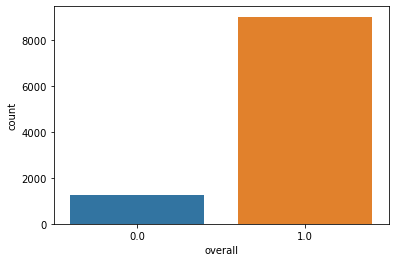

In [62]:
sns.countplot(x = df['overall'])


In [63]:
column_list = df.columns
column_list

Index(['abil', 'abl', 'absolut', 'ac', 'accessori', 'accur', 'acoust',
       'across', 'action', 'activ',
       ...
       'wow', 'wrong', 'xlr', 'yamaha', 'ye', 'year', 'yet', 'youtub', 'zoom',
       'overall'],
      dtype='object', length=1001)

In [64]:
column_list[:-1]

Index(['abil', 'abl', 'absolut', 'ac', 'accessori', 'accur', 'acoust',
       'across', 'action', 'activ',
       ...
       'wound', 'wow', 'wrong', 'xlr', 'yamaha', 'ye', 'year', 'yet', 'youtub',
       'zoom'],
      dtype='object', length=1000)

In [65]:
X = np.array(df[[i for i in column_list[:-1]]])
y = np.array(df['overall'])

### SMOTE

In [66]:
from imblearn.over_sampling import SMOTE

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [68]:
sm = SMOTE(random_state=2)
X_smote,y_smote=sm.fit_sample(X_train,y_train)

In [69]:
print("after SMOTE,counts of label '1':{}".format(sum(y_smote==1)))
print("after SMOTE,counts of label '0':{}".format(sum(y_smote==0)))

after SMOTE,counts of label '1':6313
after SMOTE,counts of label '0':6313


In [70]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_smote)


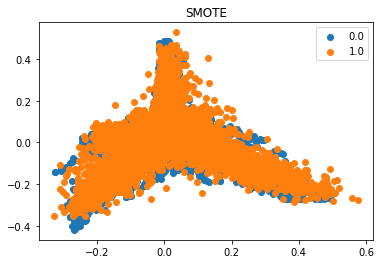

In [71]:
def draw_plot(X_smote,y_smote,label):
    for l in np.unique(y_smote):
        plt.scatter(
                    X_2d[y_smote==l,0],
                    X_2d[y_smote==l,1],
                    label=l
        )
    plt.title(label)
    plt.legend()
    plt.show()
             
draw_plot(X_smote,y_smote,"SMOTE")            
                
        

In [73]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_smote,y_smote,test_size = 0.3, random_state = 1)
X_train1, X_cv, y_train1, y_cv = train_test_split(X_smote,y_smote,test_size = 0.20, random_state = 10)
print(X_train1.shape, X_test1.shape, X_cv. shape, y_train1.shape, y_test1.shape, y_cv.shape)
y_test1.shape


(10100, 1000) (3788, 1000) (2526, 1000) (10100,) (3788,) (2526,)


(3788,)

## KNN

In [74]:
def trainKNN(X_train1, y_train1, k): 
    classifier = KNeighborsClassifier(n_neighbors=k, n_jobs = -1)
    classifier.fit(X_train1,y_train1)
    return classifier

In [75]:
def predictClassifier(X_test1, classifier):
    y_pred = classifier.predict(X_test1)
    return y_pred

In [76]:
def calculateAccuracy(y_pred, y_test1):
    accuracy = accuracy_score(y_pred, y_test1)
    return accuracy

In [77]:
kvalues = [x for x in range(1,30,2)]
AccuracyList = []
for k in tqdm(kvalues):
    knnClassifier = trainKNN(X_train1, y_train1, k)
    y_pred = predictClassifier(X_cv, knnClassifier)
    acc = calculateAccuracy(y_pred, y_cv)
    AccuracyList.append(acc)
  


100%|██████████| 15/15 [16:03<00:00, 64.25s/it]


In [78]:
AccuracyList

[0.6262866191607285,
 0.5673000791765638,
 0.5427553444180523,
 0.5312747426761678,
 0.5221694378463975,
 0.5209817893903405,
 0.5154394299287411,
 0.5122723673792557,
 0.5095011876484561,
 0.5071258907363421,
 0.5067300079176563,
 0.5063341250989707,
 0.5071258907363421,
 0.504750593824228,
 0.5043547110055424]

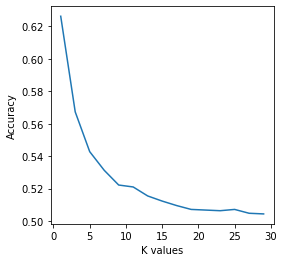

In [79]:
f = plt.figure(figsize = (4,4))
ax = plt.subplot()
plt.plot(kvalues,AccuracyList)
ax.set_xlabel('K values', fontsize = 10)
ax.set_ylabel('Accuracy', fontsize = 10)
plt.show()


In [80]:
classifier = trainKNN(X_train1,y_train1, 5)
y_pred = predictClassifier(X_test1, knnClassifier)
acc = calculateAccuracy(y_pred, y_test1)
print("Final Accuracy: ",acc)

Final Accuracy:  0.5126715945089757


In [81]:
confusion_matrix(y_test1,y_pred)

array([[1901,    1],
       [1845,   41]], dtype=int64)

In [82]:
print(classification_report(y_test1,y_pred))

              precision    recall  f1-score   support

         0.0       0.51      1.00      0.67      1902
         1.0       0.98      0.02      0.04      1886

    accuracy                           0.51      3788
   macro avg       0.74      0.51      0.36      3788
weighted avg       0.74      0.51      0.36      3788



## Logistic Regression


In [83]:
param = {
    'C' : [10**x for x in range(-4,4,1)],
    'penalty': ['l1','l2'],
    'solver' : ['saga','liblinear']    
}
clfLR = LogisticRegression()
clf_GSLR = GridSearchCV(clfLR, param_grid =param, cv = 5, n_jobs = -1, verbose = 5)
clf_GSLR.fit(X_BoW,y_BoW)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 12.6min finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['saga', 'liblinear']},
             verbose=5)

In [84]:
clf_GSLR.best_score_

0.8896794402524144

In [85]:
bestLRCLF = clf_GSLR.best_estimator_
bestLRCLF.fit(X_train1,y_train1)
y_pred = bestLRCLF.predict(X_test1)

In [86]:
print(classification_report(y_test1,y_pred))
print("Accuracy Logistic Regression: ",accuracy_score(y_test1,y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.78      0.77      1902
         1.0       0.77      0.76      0.77      1886

    accuracy                           0.77      3788
   macro avg       0.77      0.77      0.77      3788
weighted avg       0.77      0.77      0.77      3788

Accuracy Logistic Regression:  0.7708553326293559


In [88]:
confusion_matrix(y_test1,y_pred)

array([[1481,  421],
       [ 447, 1439]], dtype=int64)

## Decision Tree

In [89]:
parameters = {
                'max_depth': [x for x in range(4,11,2)],
                'min_samples_split': [x for x in range(2,100,10)],
                'max_features': [x for x in range(100,1000,100)]                
}

clfDT = DecisionTreeClassifier()
clfGSDT = GridSearchCV(clfDT, param_grid = parameters, cv = 10, n_jobs  = -1, verbose = 10)
clfGSDT.fit(X_train1, y_train1)

Fitting 10 folds for each of 360 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10],
                         'max_features': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900],
                         'min_samples_split': [2, 12, 22, 32, 42, 52, 62, 72,
                                               82, 92]},
             verbose=10)

In [90]:
DT = clfGSDT.best_estimator_
print('Best Estimator: ')
DT

Best Estimator: 


DecisionTreeClassifier(max_depth=10, max_features=800)

In [91]:
print('Best score: ', clfGSDT.best_score_)

Best score:  0.8096039603960395


In [95]:
DT.fit(X_train1,y_train1)
y_pred = DT.predict(X_test1)

In [96]:
print(classification_report (y_test1,y_pred))
print("Accuracy : ",accuracy_score(y_test1,y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.82      0.85      1902
         1.0       0.83      0.90      0.86      1886

    accuracy                           0.86      3788
   macro avg       0.86      0.86      0.86      3788
weighted avg       0.86      0.86      0.86      3788

Accuracy :  0.8577085533262936


In [97]:
confusion_matrix(y_test1,y_pred)

array([[1555,  347],
       [ 192, 1694]], dtype=int64)

## Random Classifier

In [98]:
clfRF = RandomForestClassifier(random_state=42)


In [99]:
param_grid ={
    'n_estimators':[100,300],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[4,5,6,7,8],
    'criterion':['gini','entropy']
    }

In [100]:
clf_rfgs = GridSearchCV(estimator=clfRF,param_grid=param_grid,cv=5,n_jobs=-1)
clf_rfgs.fit(X_train1,y_train1)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 300]})

In [101]:
y_pred = clf_rfgs.predict(X_test1)
print(confusion_matrix(y_test1,y_pred))
print(accuracy_score(y_test1,y_pred))

[[1577  325]
 [ 146 1740]]
0.8756599788806758


In [102]:
print(classification_report(y_test1,y_pred))
print("Accuracy RF: ",accuracy_score(y_test1,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.83      0.87      1902
         1.0       0.84      0.92      0.88      1886

    accuracy                           0.88      3788
   macro avg       0.88      0.88      0.88      3788
weighted avg       0.88      0.88      0.88      3788

Accuracy RF:  0.8756599788806758


### XGBOOST

In [103]:
clfXGB = XGBClassifier()
params = {
    "colsample_bytree": (0.7, 0.3),
    "gamma": (0, 0.5),
    "learning_rate": (0.03,0.3), # default 0.1 
    "max_depth": (2,6), # default 3
    "n_estimators": (100, 150), # default 100
    "subsample": (0.6,0.4)
}

In [104]:
clf_xgbgs = GridSearchCV(estimator=clfXGB,param_grid=params,cv=5,n_jobs=-1)
clf_xgbgs.fit(X_train1,y_train1)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [105]:
y_pred = clf_xgbgs.predict(X_test1)
print(confusion_matrix(y_test1,y_pred))
print(accuracy_score(y_test1,y_pred))

[[1861   41]
 [  28 1858]]
0.9817845828933475


In [106]:
print(classification_report(y_test1,y_pred))
print("Accuracy XGB: ",accuracy_score(y_test1,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      1902
         1.0       0.98      0.99      0.98      1886

    accuracy                           0.98      3788
   macro avg       0.98      0.98      0.98      3788
weighted avg       0.98      0.98      0.98      3788

Accuracy XGB:  0.9817845828933475


## SVM

In [ ]:
#clfSVM = SVC()
#params = {
    # 'C':[1,10,100,1000],
     #'gamma':[1,0.1,0.001,0.0001], 
     #'kernel':['linear','rbf']
#}


In [ ]:
#clf_svmgs = GridSearchCV(estimator=clfSVM,param_grid=params,cv=5,n_jobs=-1)
#clf_svmgs.fit(X_train1,y_train1)

In [ ]:
#y_pred = clf_svmgs.predict(X_test)
#print(confusion_matrix(y_test1,y_pred))
#print(accuracy_score(y_test1,y_pred))

In [ ]:
#(classification_report(y_test1,y_pred))
#print("Accuracy svm: ",accuracy_score(y_test1,y_pred))

# Oversampling

In [107]:
from sklearn.utils import resample

#separating majority and minority classes
df_majority = df[df.overall == 1]
df_minority = df[df.overall == 0]



In [108]:
#Upsampling minority class

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=9022,    # to match majority class
                                 random_state=123) 

#combining majority classes with upsampled minority class

df_upsampled = pd.concat([df_majority, df_minority_upsampled])



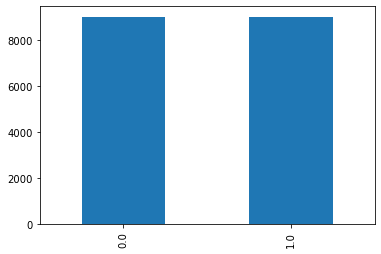

In [109]:
upsampledData = pd.concat([df_majority,df_minority_upsampled])
upsampledData.shape
upsampledData['overall'].value_counts().plot.bar()

In [110]:
upsampledData.shape

(18044, 1001)

### Data Visualization using PCA

In [111]:
from sklearn.decomposition import PCA

In [112]:
X_BoW = upsampledData.drop(['overall'], axis = 1, inplace = False)
y_BoW = upsampledData['overall']

In [113]:
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(X_BoW)


In [114]:
principal_components = pd.DataFrame(data = principal_components, columns = ['l1', 'l2'])
principal_components.reset_index(drop=True, inplace=True)
upsampledData['overall'].reset_index(drop=True, inplace=True)
final_DF = pd.concat( [principal_components, upsampledData['overall']], axis = 1)

In [115]:
upsampledData.shape

(18044, 1001)

['#10AEFD', '#DB9758', '#F71252', '#07981E', '#6985B5', '#ECD75A', '#FB8B34', '#8E1730', '#52099B', '#119D58']


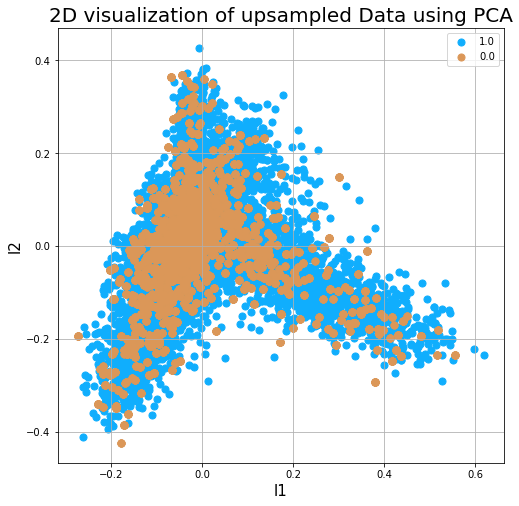

In [116]:
fig = plt.figure(figsize = (8,8))
ax = plt.subplot(1,1,1)
ax.set_xlabel('l1', fontsize = 15)
ax.set_ylabel('l2', fontsize = 15)
ax.set_title('2D visualization of upsampled Data using PCA', fontsize = 20)

targets = list(upsampledData['overall'].unique())
random.seed(10)
colors = []
for i in range(10):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
print(colors)
for target, color in zip(targets,colors):
    indicesToKeep = final_DF['overall'] == target
    ax.scatter(final_DF.loc[indicesToKeep, 'l1'], final_DF.loc[indicesToKeep,'l2'], c = color, s=50)
ax.legend(targets)
ax.grid()

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_BoW,y_BoW,test_size = 0.3, random_state = 1)
X_train, X_cv, y_train, y_cv = train_test_split(X_BoW,y_BoW,test_size = 0.20, random_state = 10)
print(X_train.shape, X_test.shape, X_cv. shape, y_train.shape, y_test.shape, y_cv.shape)
y_test.shape


(14435, 1000) (5414, 1000) (3609, 1000) (14435,) (5414,) (3609,)


(5414,)

## KNN

In [118]:
def trainKNN(X_train, y_train, k): 
    classifier = KNeighborsClassifier(n_neighbors=k, n_jobs = -1)
    classifier.fit(X_train,y_train)
    return classifier

In [119]:
def predictClassifier(X_test, classifier):
    y_pred = classifier.predict(X_test)
    return y_pred

In [120]:
def calculateAccuracy(y_pred, y_test):
    accuracy = accuracy_score(y_pred, y_test)
    return accuracy

In [121]:
kvalues = [x for x in range(1,30,2)]
AccuracyList = []
for k in tqdm(kvalues):
    knnClassifier = trainKNN(X_train, y_train, k)
    y_pred = predictClassifier(X_cv, knnClassifier)
    acc = calculateAccuracy(y_pred, y_cv)
    AccuracyList.append(acc)
  


100%|██████████| 15/15 [17:09<00:00, 68.62s/it]


In [122]:
AccuracyList

[0.9420892213909671,
 0.8955389304516487,
 0.8487115544472152,
 0.7993904128567471,
 0.7736215018010529,
 0.7633693543917983,
 0.7475755056802439,
 0.7475755056802439,
 0.7556109725685786,
 0.745358825159324,
 0.7323358270989194,
 0.7367691881407592,
 0.7273482959268496,
 0.7259628706012746,
 0.7248545303408146]

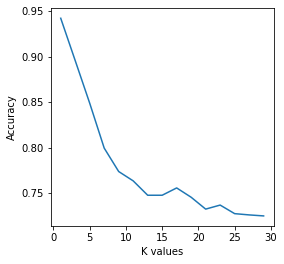

In [123]:
f = plt.figure(figsize = (4,4))
ax = plt.subplot()
plt.plot(kvalues,AccuracyList)
ax.set_xlabel('K values', fontsize = 10)
ax.set_ylabel('Accuracy', fontsize = 10)
plt.show()


In [124]:
classifier = trainKNN(X_train,y_train, 5)
y_pred = predictClassifier(X_test, knnClassifier)
acc = calculateAccuracy(y_pred, y_test)
print("Final Accuracy: ",acc)

Final Accuracy:  0.7554488363502032


In [125]:
print('accuracy score:',accuracy_score(y_test,y_pred))

accuracy score: 0.7554488363502032


In [126]:
confusion_matrix(y_test,y_pred)

array([[2102,  591],
       [ 733, 1988]], dtype=int64)

In [127]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.78      0.76      2693
         1.0       0.77      0.73      0.75      2721

    accuracy                           0.76      5414
   macro avg       0.76      0.76      0.76      5414
weighted avg       0.76      0.76      0.76      5414



### Logistic Regression

In [128]:
param = {
    'C' : [10**x for x in range(-4,4,1)],
    'penalty': ['l1','l2'],
    'solver' : ['saga','liblinear']    
}
clfLR = LogisticRegression()
clf_GSLR = GridSearchCV(clfLR, param_grid =param, cv = 5, n_jobs = -1, verbose = 5)
clf_GSLR.fit(X_BoW,y_BoW)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 12.5min finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['saga', 'liblinear']},
             verbose=5)

In [129]:
clf_GSLR.best_score_

0.8581784943897954

In [130]:
bestLRCLF = clf_GSLR.best_estimator_
bestLRCLF.fit(X_train,y_train)
y_pred = bestLRCLF.predict(X_test)

In [131]:
print(classification_report(y_test,y_pred))
print("Accuracy Logistic Regression: ",accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90      2693
         1.0       0.93      0.87      0.90      2721

    accuracy                           0.90      5414
   macro avg       0.90      0.90      0.90      5414
weighted avg       0.90      0.90      0.90      5414

Accuracy Logistic Regression:  0.8993350572589582


In [132]:
confusion_matrix(y_test,y_pred)

array([[2514,  179],
       [ 366, 2355]], dtype=int64)

### Decision Tree

In [133]:
parameters = {
                'max_depth': [x for x in range(4,11,2)],
                'min_samples_split': [x for x in range(2,100,10)],
                'max_features': [x for x in range(100,1000,100)]                
}

clfDT = DecisionTreeClassifier()
clfGSDT = GridSearchCV(clfDT, param_grid = parameters, cv = 10, n_jobs  = -1, verbose = 10)
clfGSDT.fit(X_train, y_train)

Fitting 10 folds for each of 360 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10],
                         'max_features': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900],
                         'min_samples_split': [2, 12, 22, 32, 42, 52, 62, 72,
                                               82, 92]},
             verbose=10)

In [134]:
DT = clfGSDT.best_estimator_
print('Best Estimator: ')
DT

Best Estimator: 


DecisionTreeClassifier(max_depth=10, max_features=900, min_samples_split=12)

In [135]:
print('Best score: ', clfGSDT.best_score_)

Best score:  0.7798398707678487


In [136]:
DT.fit(X_train,y_train)
y_pred = DT.predict(X_test)

In [137]:
print(classification_report(y_test,y_pred))
print("Accuracy : ",accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.91      0.83      2693
         1.0       0.89      0.71      0.79      2721

    accuracy                           0.81      5414
   macro avg       0.82      0.81      0.81      5414
weighted avg       0.82      0.81      0.81      5414

Accuracy :  0.8104913188031031


In [138]:
confusion_matrix(y_test,y_pred)

array([[2458,  235],
       [ 791, 1930]], dtype=int64)

### Random Forest 

In [139]:
clfRF = RandomForestClassifier(random_state=42)
param_grid ={
    'n_estimators':[100,300],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[4,5,6,7,8],
    'criterion':['gini','entropy']
    }

In [140]:
clf_rfgs = GridSearchCV(estimator=clfRF,param_grid=param_grid,cv=5,n_jobs=-1)
clf_rfgs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 300]})

In [141]:
y_pred = clf_rfgs.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[2321  372]
 [ 314 2407]]
0.8732914665681566


In [142]:
print(classification_report(y_test,y_pred))
print("Accuracy RF: ",accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      2693
         1.0       0.87      0.88      0.88      2721

    accuracy                           0.87      5414
   macro avg       0.87      0.87      0.87      5414
weighted avg       0.87      0.87      0.87      5414

Accuracy RF:  0.8732914665681566


### XGBOOST

In [143]:
clfXGB = XGBClassifier()
params = {
    "colsample_bytree": (0.7, 0.3),
    "gamma": (0, 0.5),
    "learning_rate": (0.03,0.3), # default 0.1 
    "max_depth": (2,6), # default 3
    "n_estimators": (100, 150), # default 100
    "subsample": (0.6,0.4)
}


In [144]:
clf_xgbgs = GridSearchCV(estimator=clfXGB,param_grid=params,cv=5,n_jobs=-1)
clf_xgbgs.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [145]:
y_pred = clf_xgbgs.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[2687    6]
 [  94 2627]]
0.981529368304396


In [146]:
print(classification_report(y_test,y_pred))
print("Accuracy XGB: ",accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      2693
         1.0       1.00      0.97      0.98      2721

    accuracy                           0.98      5414
   macro avg       0.98      0.98      0.98      5414
weighted avg       0.98      0.98      0.98      5414

Accuracy XGB:  0.981529368304396
